<a href="https://colab.research.google.com/github/pedrovcardoso/trabalho-estatistica/blob/main/trabalho_estat%C3%ADstica_testes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
install.packages(c("readxl", "knitr", "tidyverse", "skimr", "ggplot2", "patchwork", "dplyr", "scales", "ggrepel", "kableExtra"))

library(readxl)
library(knitr)
library(tidyverse)
library(skimr)
library(ggplot2)
library(patchwork)
library(dplyr)
library(scales)
library(ggrepel)
library(kableExtra)


dados <- read_excel("dados10.xlsx", sheet = "dados10")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘svglite’



Attaching package: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows




In [85]:
get_mode <- function(v) {
  v <- v[!is.na(v)]
  uniqv <- unique(v)
  uniqv[which.max(tabulate(match(v, uniqv)))]
}

colunas_interesse <- c("read12", "math12", "motheduc", "fatheduc", "lfaminc")

estatisticas_descritivas <- tibble(
  Medida = c("Mínimo", "Máximo", "Média", "Moda", "Mediana", "Desvio Padrão", "Variância", "Coeficiente de Variação (%)")
) %>%
  bind_cols(
    map_dfc(dados[colunas_interesse], ~ c(
      min(.x, na.rm = TRUE),
      max(.x, na.rm = TRUE),
      mean(.x, na.rm = TRUE),
      get_mode(.x),
      median(.x, na.rm = TRUE),
      sd(.x, na.rm = TRUE),
      var(.x, na.rm = TRUE),
      (sd(.x, na.rm = TRUE) / mean(.x, na.rm = TRUE)) * 100
    ))
  )

kable(estatisticas_descritivas,
      digits = 4,
      caption = "Tabela de Medidas Descritivas",
      format = "pipe")



Table: Tabela de Medidas Descritivas

|Medida                      |  read12|  math12| motheduc| fatheduc| lfaminc|
|:---------------------------|-------:|-------:|--------:|--------:|-------:|
|Mínimo                      | 29.7000| 30.1400|   8.0000|   8.0000|  6.2146|
|Máximo                      | 68.0900| 71.1200|  18.0000|  18.0000| 12.3458|
|Média                       | 51.7073| 51.8924|  13.3198|  13.6705| 10.3568|
|Moda                        | 67.5100| 50.7300|  14.0000|  14.0000| 10.6573|
|Mediana                     | 53.2550| 52.3900|  14.0000|  14.0000| 10.3090|
|Desvio Padrão               |  9.5679|  9.4610|   2.0220|   2.2953|  0.8032|
|Variância                   | 91.5449| 89.5107|   4.0884|   5.2683|  0.6452|
|Coeficiente de Variação (%) | 18.5040| 18.2320|  15.1804|  16.7900|  7.7555|

In [77]:
# --- Pacotes necessários ---
install.packages(c("tidyverse", "knitr", "gt"))
library(tidyverse)
library(knitr)
library(gt)

# --- 1️⃣ Tabela de contingência Parcath x Raça ---
contingency_table_parcath_race <- dados_tratados %>%
  filter(!is.na(parcath) & !is.na(race_name)) %>%
  count(parcath, race_name) %>%
  pivot_wider(names_from = race_name, values_from = n, values_fill = 0) %>%
  mutate(parcath = factor(parcath, levels = c(TRUE, FALSE), labels = c("Yes", "No")))

# --- 1a. Exibição simples no console ---
cat("\nTabela de Contingência: Parcath vs. Raça\n")
kable(contingency_table_parcath_race, format = "pipe", digits = 0)

# --- 1b. Exibição elegante com GT (opcional, funciona no Viewer) ---
contingency_table_parcath_race %>%
  gt() %>%
  tab_header(
    title = "Tabela de Contingência: Parcath vs. Raça"
  )

# --- 2️⃣ Teste Qui-quadrado ---
# Criar a tabela para o teste
chi_table <- table(dados_tratados$parcath, dados_tratados$race_name)
chi_squared_result <- chisq.test(chi_table)

# Cálculo do V de Cramer
n_total <- sum(chi_squared_result$observed)
min_dim <- min(nrow(chi_squared_result$observed), ncol(chi_squared_result$observed))
cramer_v <- sqrt(chi_squared_result$statistic / (n_total * (min_dim - 1)))

# --- 2a. Exibição dos resultados no console ---
resultados <- tibble(
  Estatistica_Qui_Quadrado = round(chi_squared_result$statistic, 4),
  Graus_de_Liberdade = chi_squared_result$parameter,
  P_valor = formatC(chi_squared_result$p.value, format = "e", digits = 4),
  V_de_Cramer = round(cramer_v, 4)
)

cat("\nResultados do Teste Qui-quadrado: Parcath vs. Raça\n")
kable(resultados, format = "pipe")

# --- 2b. Exibição elegante com GT (opcional) ---
resultados %>%
  gt() %>%
  tab_header(
    title = "Resultados do Teste Qui-quadrado: Parcath vs. Raça"
  )

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘V8’, ‘litedown’, ‘reactR’, ‘bigD’, ‘bitops’, ‘juicyjuice’, ‘markdown’, ‘reactable’





Tabela de Contingência: Parcath vs. Raça




|parcath | Asian| Black| Hispan| White|
|:-------|-----:|-----:|------:|-----:|
|No      |    66|   134|     40|  1055|
|Yes     |    26|    11|    169|   499|

ERROR while rich displaying an object: Error in (function (..., row.names = NULL, check.rows = FALSE, check.names = TRUE, : arguments imply differing number of rows: 1, 0, 10

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .       

<div id="dahmakplxv" style="padding-left:0px;padding-right:0px;padding-top:10px;padding-bottom:10px;overflow-x:auto;overflow-y:auto;width:auto;height:auto;">
  <style>#dahmakplxv table {
  font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji';
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}

#dahmakplxv thead, #dahmakplxv tbody, #dahmakplxv tfoot, #dahmakplxv tr, #dahmakplxv td, #dahmakplxv th {
  border-style: none;
}

#dahmakplxv p {
  margin: 0;
  padding: 0;
}

#dahmakplxv .gt_table {
  display: table;
  border-collapse: collapse;
  line-height: normal;
  margin-left: auto;
  margin-right: auto;
  color: #333333;
  font-size: 16px;
  font-weight: normal;
  font-style: normal;
  background-color: #FFFFFF;
  width: auto;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #A8A8A8;
  border-right-style: none;
  border-right-width: 2px;
  b


Resultados do Teste Qui-quadrado: Parcath vs. Raça




| Estatistica_Qui_Quadrado| Graus_de_Liberdade|P_valor    | V_de_Cramer|
|------------------------:|------------------:|:----------|-----------:|
|                 247.7948|                  3|1.9623e-53 |       0.352|

ERROR while rich displaying an object: Error in (function (..., row.names = NULL, check.rows = FALSE, check.names = TRUE, : arguments imply differing number of rows: 1, 0, 10

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .       

<div id="uiunualglb" style="padding-left:0px;padding-right:0px;padding-top:10px;padding-bottom:10px;overflow-x:auto;overflow-y:auto;width:auto;height:auto;">
  <style>#uiunualglb table {
  font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji';
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}

#uiunualglb thead, #uiunualglb tbody, #uiunualglb tfoot, #uiunualglb tr, #uiunualglb td, #uiunualglb th {
  border-style: none;
}

#uiunualglb p {
  margin: 0;
  padding: 0;
}

#uiunualglb .gt_table {
  display: table;
  border-collapse: collapse;
  line-height: normal;
  margin-left: auto;
  margin-right: auto;
  color: #333333;
  font-size: 16px;
  font-weight: normal;
  font-style: normal;
  background-color: #FFFFFF;
  width: auto;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #A8A8A8;
  border-right-style: none;
  border-right-width: 2px;
  b

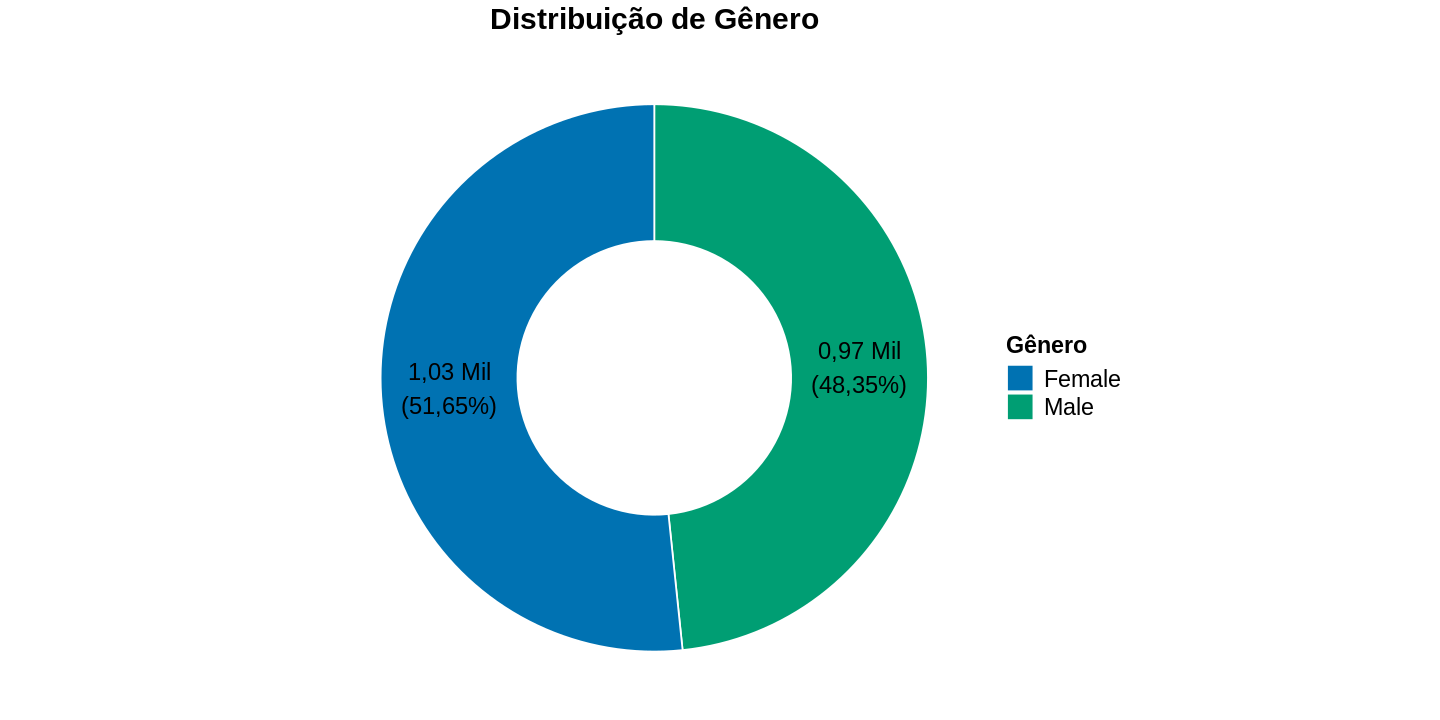

In [64]:
# Definir uma paleta de cores similar à da imagem
cores_azuis <- c("Female" = "#0072B2", "Male" = "#009E73") # Adjusted colors for better contrast

# --- Gráfico 1: Gráfico de Rosca (Donut Chart) para Gênero ---

# 1. Preparar os dados para o gráfico de gênero
gender_data <- dados_tratados %>%
  filter(!is.na(gender)) %>%
  count(gender) %>%
  # Ordenar por gênero para garantir consistência nas cores
  arrange(desc(gender)) %>% # Arrange in descending order to start with Female
  # Calcular a posição do rótulo e o texto formatado
  mutate(
    percentage = n / sum(n) * 100,
    # Formata o rótulo para "14,46 Mil (51,65%)"
    label_text = paste0(
      format(round(n / 1000, 2), nsmall = 2, decimal.mark = ","), " Mil\n(",
      format(round(percentage, 2), nsmall = 2, decimal.mark = ","), "%)"
    ),
    # Posição y do rótulo no meio de cada fatia
    label_pos = cumsum(percentage) - 0.5 * percentage
  )

# 2. Criar o gráfico de Rosca
ggplot(gender_data, aes(x = 2, y = percentage, fill = gender)) +
  geom_col(width = 1, color = "white") + # Barras com borda branca para separar
  # Adiciona os rótulos de texto formatados
  geom_text(aes(y = label_pos, label = label_text), color = "black", size = 5) + # Increased text size
  # Converte para coordenadas polares (gráfico de pizza)
  coord_polar(theta = "y", start = 0) +
  # Cria o "buraco" no meio para o efeito de rosca
  xlim(c(0.5, 2.5)) +
  # Aplica a paleta de cores definida
  scale_fill_manual(values = cores_azuis) +
  # Adiciona o título
  labs(
    title = "Distribuição de Gênero",
    fill = "Gênero" # Título da legenda
  ) +
  # Remove todos os elementos de tema desnecessários (eixos, fundo, etc.)
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 18), # Increased title size
    legend.title = element_text(face = "bold", size = 14), # Increased legend title size
    legend.text = element_text(size = 14), # Increased legend text size
    plot.background = element_rect(fill = "white", color = NA), # Add white background
    panel.background = element_rect(fill = "white", color = NA)
  )

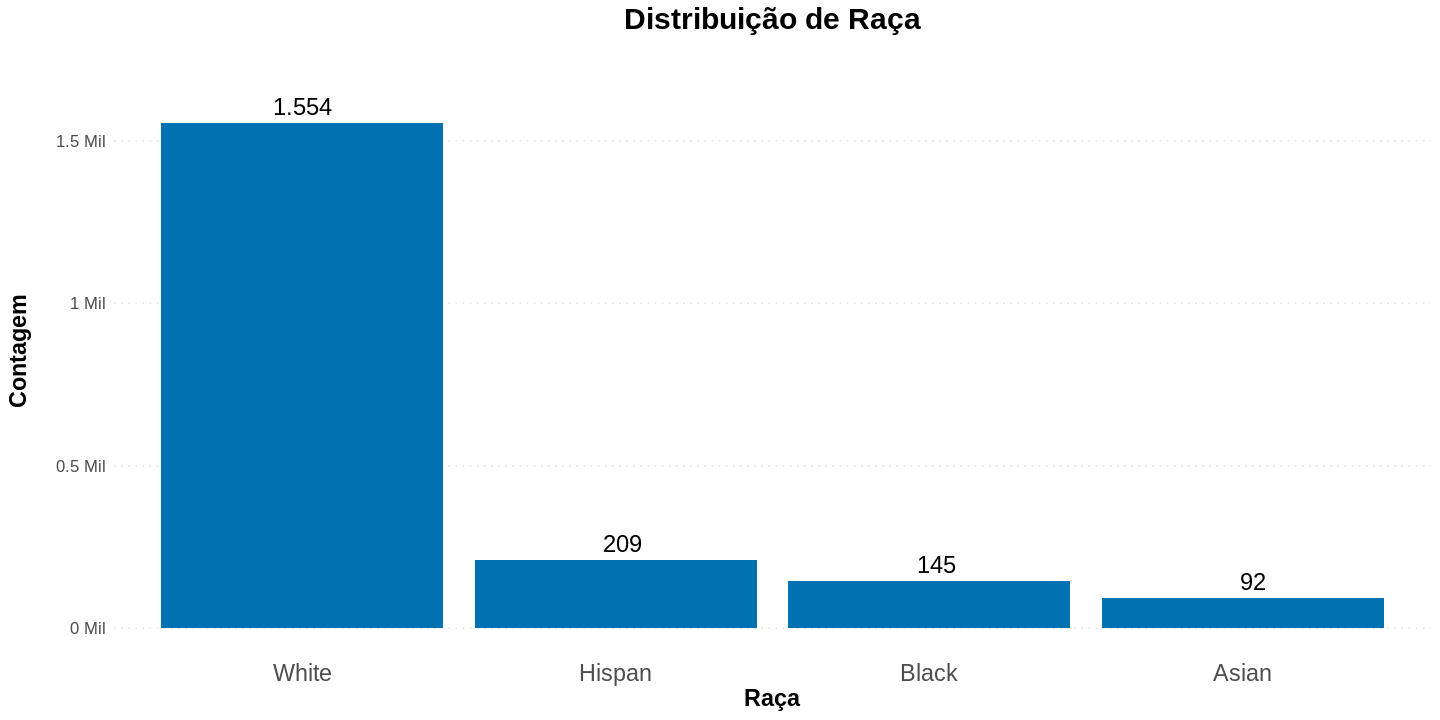

In [65]:
# --- Gráfico 2: Gráfico de Barras Personalizado para Raça ---

# 1. Preparar os dados para o gráfico de raça (ordenar as barras)
race_data <- dados_tratados %>%
  filter(!is.na(race_name)) %>%
  count(race_name) %>%
  # Reordena o fator 'race_name' pela contagem 'n' em ordem decrescente
  mutate(race_name = reorder(race_name, -n))

# 2. Criar o gráfico de Barras
ggplot(race_data, aes(x = race_name, y = n)) +
  geom_col(fill = "#0072B2") + # Define a cor de preenchimento das barras similar ao gráfico de gênero
  # Adiciona o texto com a contagem no topo de cada barra
  geom_text(
    aes(label = format(n, big.mark = ".", decimal.mark = ",")), # Formata o número com ponto de milhar and comma for decimal
    vjust = -0.5, # Posição vertical do texto (acima da barra)
    size = 5, # Increased text size
    color = "black" # Altera a cor do texto para preto
  ) +
  # Formata o eixo Y para exibir em "Mil"
  scale_y_continuous(
    labels = function(x) paste(x / 1000, "Mil"),
    # Define um limite um pouco maior para dar espaço aos rótulos
    limits = c(0, max(race_data$n) * 1.1)
  ) +
  # Define os títulos e nomes dos eixos
  labs(
    title = "Distribuição de Raça", # Altera o título para ser mais descritivo
    x = "Raça", # Altera o título do eixo X
    y = "Contagem" # Altera o título do eixo Y
  ) +
  # Aplica um tema limpo
  theme_minimal() +
  # Personalizações finais do tema para se assemelhar ao gráfico de gênero
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 18), # Centraliza e aumenta o tamanho do título
    axis.title.x = element_text(face = "bold", size = 14), # Aumenta o tamanho do título do eixo X
    axis.title.y = element_text(face = "bold", size = 14), # Aumenta o tamanho do título do eixo Y
    axis.text.x = element_text(size = 14), # Aumenta o tamanho do texto do eixo X
    axis.text.y = element_text(size = 10), # Aumenta o tamanho do texto do eixo Y
    panel.grid.major.x = element_blank(), # Remove as linhas de grade verticais
    panel.grid.minor.y = element_blank(), # Remove as linhas de grade horizontais secundárias
    panel.grid.major.y = element_line(color = "gray90", linetype = "dotted"), # Linhas pontilhadas
    plot.background = element_rect(fill = "white", color = NA), # Adiciona fundo branco
    panel.background = element_rect(fill = "white", color = NA)
  )

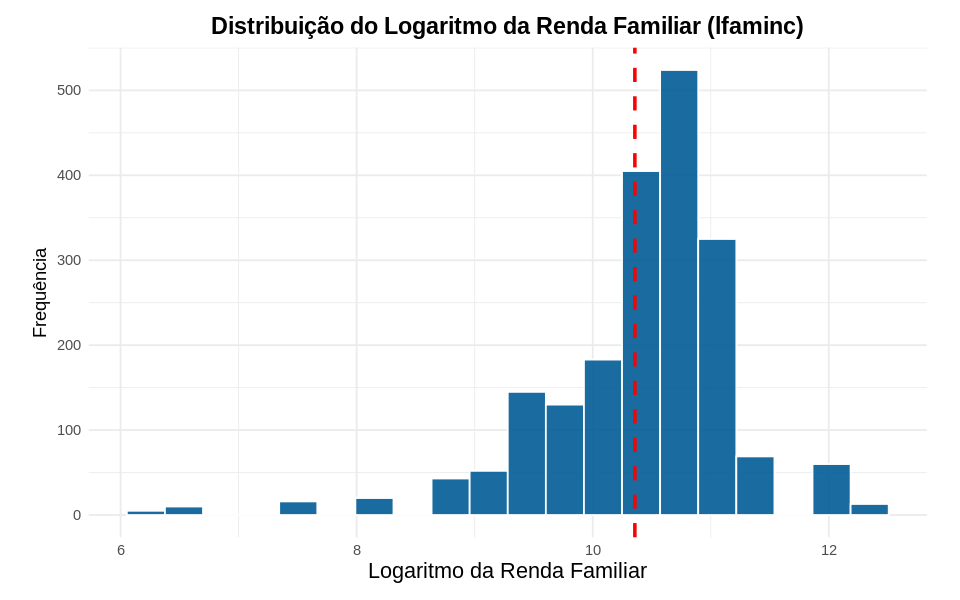

In [66]:
# --- Gráfico de distribuição do logaritmo da renda familiar ---
p_lfaminc <- ggplot(dados_tratados, aes(x = lfaminc)) +
  geom_histogram(bins = 20, fill = "#005B96", color = "white", alpha = 0.9) +
  geom_vline(aes(xintercept = mean(lfaminc, na.rm = TRUE)),
             color = "red", linetype = "dashed", linewidth = 1) +
  labs(
    title = "Distribuição do Logaritmo da Renda Familiar (lfaminc)",
    x = "Logaritmo da Renda Familiar",
    y = "Frequência"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 14),
    axis.title.x = element_text(size = 13),
    plot.margin = margin(10, 20, 10, 20)
  )

# Exibir
options(repr.plot.width = 8, repr.plot.height = 5)
p_lfaminc


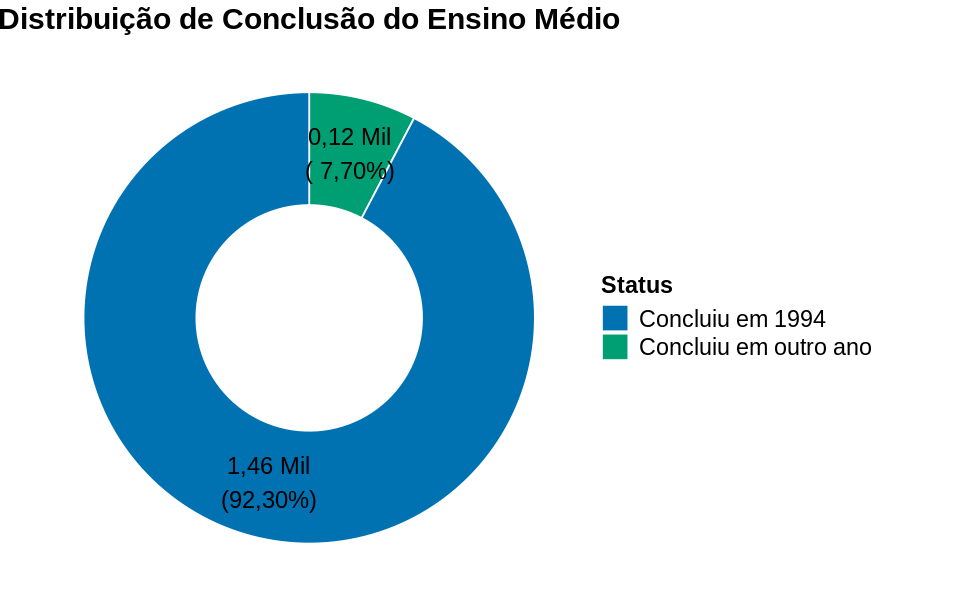

In [67]:
# Paleta de cores similar à anterior
cores_hsgrad <- c("Concluiu em 1994" = "#0072B2", "Concluiu em outro ano" = "#009E73")

# --- Gráfico de Rosca para hsgrad considerando ano de conclusão ---
hsgrad_data <- dados_tratados %>%
  filter(!is.na(hsgrad)) %>%
  mutate(
    hsgrad_label = if_else(hsgrad == 1, "Concluiu em 1994", "Concluiu em outro ano")
  ) %>%
  count(hsgrad_label) %>%
  arrange(desc(hsgrad_label)) %>%
  mutate(
    percentage = n / sum(n) * 100,
    label_text = paste0(
      format(round(n / 1000, 2), nsmall = 2, decimal.mark = ","), " Mil\n(",
      format(round(percentage, 2), nsmall = 2, decimal.mark = ","), "%)"
    ),
    label_pos = cumsum(percentage) - 0.5 * percentage
  )

# Criar o gráfico
ggplot(hsgrad_data, aes(x = 2, y = percentage, fill = hsgrad_label)) +
  geom_col(width = 1, color = "white") +
  geom_text(aes(y = label_pos, label = label_text), color = "black", size = 5) +
  coord_polar(theta = "y", start = 0) +
  xlim(c(0.5, 2.5)) +
  scale_fill_manual(values = cores_hsgrad) +
  labs(
    title = "Distribuição de Conclusão do Ensino Médio",
    fill = "Status"
  ) +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 18),
    legend.title = element_text(face = "bold", size = 14),
    legend.text = element_text(size = 14),
    plot.background = element_rect(fill = "white", color = NA),
    panel.background = element_rect(fill = "white", color = NA)
  )


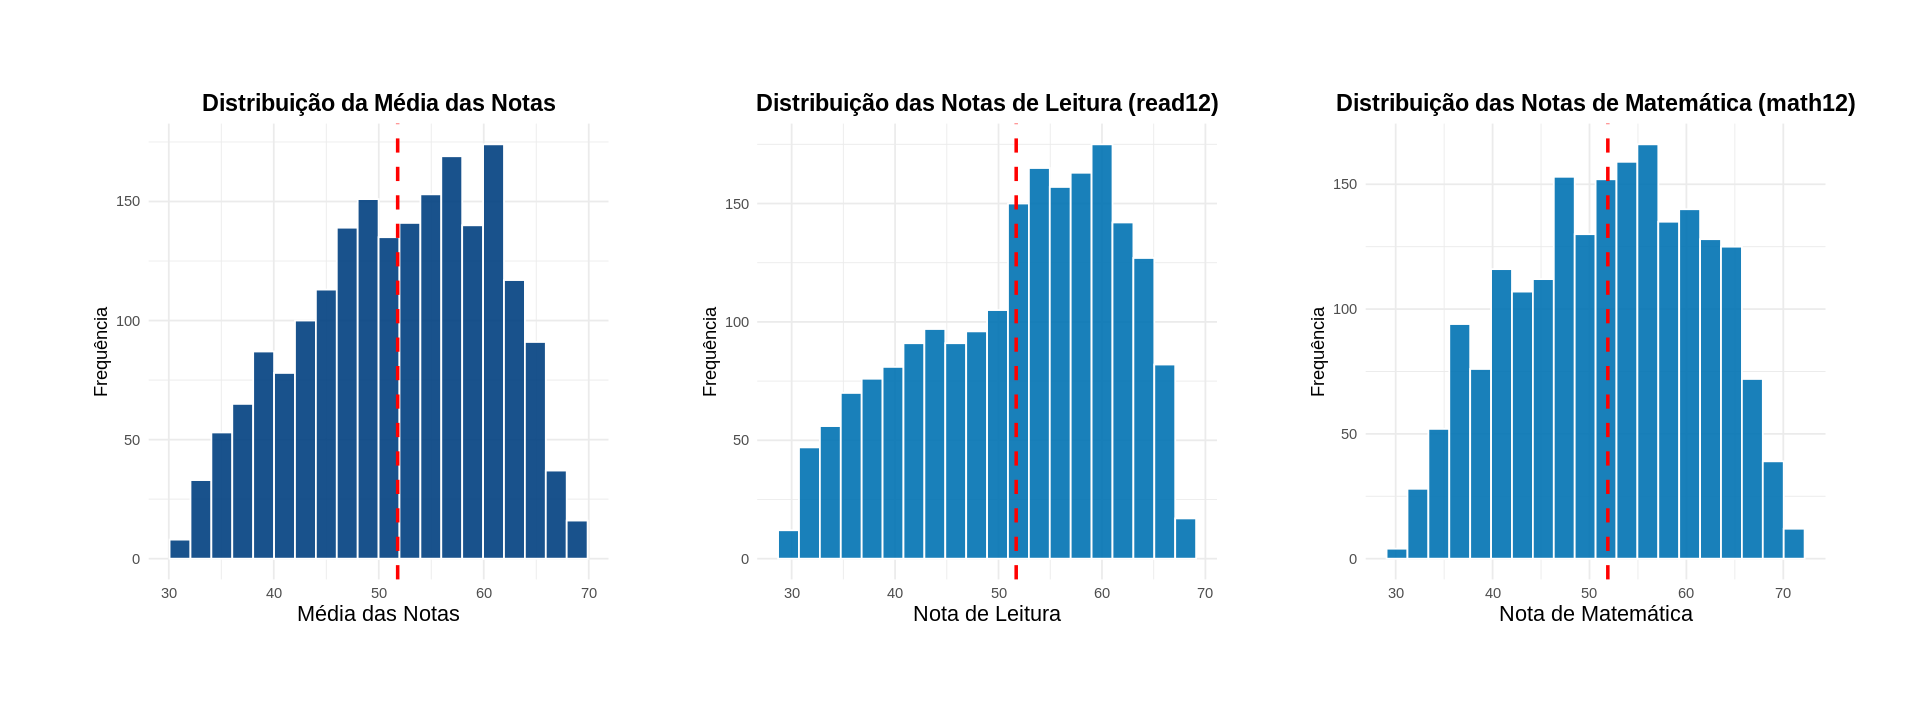

In [68]:
dados_tratados <- dados_tratados %>%
  mutate(average_score = (read12 + math12) / 2)

p_average_score <- ggplot(dados_tratados, aes(x = average_score)) +
  geom_histogram(bins = 20, fill = "#004080", color = "white", alpha = 0.9) +
  geom_vline(aes(xintercept = mean(average_score, na.rm = TRUE)), color = "red", linetype = "dashed", linewidth = 1) +
  labs(title = "Distribuição da Média das Notas", x = "Média das Notas", y = "Frequência") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 14),
    axis.title.x = element_text(size = 13),
    plot.margin = margin(10, 20, 10, 20)
  )

p_read12 <- ggplot(dados_tratados, aes(x = read12)) +
  geom_histogram(bins = 20, fill = "#0072B2", color = "white", alpha = 0.9) +
  geom_vline(aes(xintercept = mean(read12, na.rm = TRUE)), color = "red", linetype = "dashed", linewidth = 1) +
  labs(title = "Distribuição das Notas de Leitura (read12)", x = "Nota de Leitura", y = "Frequência") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 14),
    axis.title.x = element_text(size = 13),
    plot.margin = margin(10, 20, 10, 20)
  )

p_math12 <- ggplot(dados_tratados, aes(x = math12)) +
  geom_histogram(bins = 20, fill = "#0072B2", color = "white", alpha = 0.9) +
  geom_vline(aes(xintercept = mean(math12, na.rm = TRUE)), color = "red", linetype = "dashed", linewidth = 1) +
  labs(title = "Distribuição das Notas de Matemática (math12)", x = "Nota de Matemática", y = "Frequência") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 14),
    axis.title.x = element_text(size = 13),
    plot.margin = margin(10, 20, 10, 20)
  )

options(repr.plot.width = 16, repr.plot.height = 6)

(p_average_score + p_read12 + p_math12) &
  theme(plot.margin = unit(c(1, 1, 1, 1), "cm"))


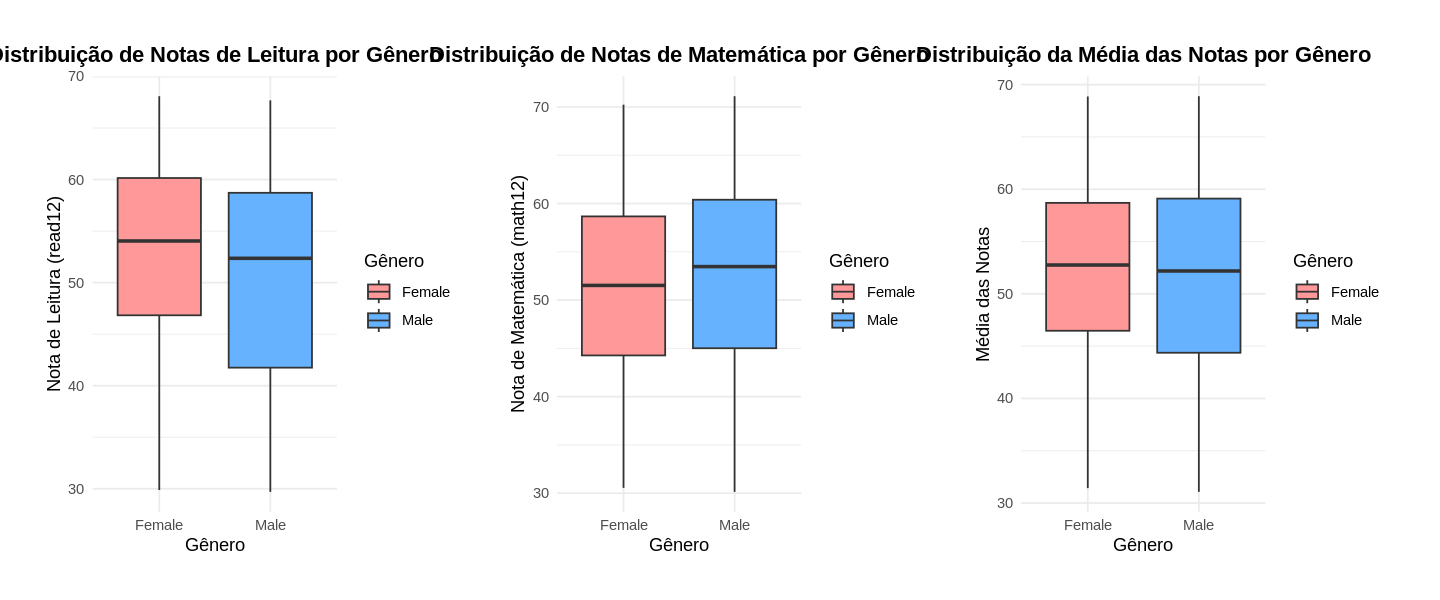

In [69]:
# Create boxplots for read12, math12, and average_score by gender

# Boxplot for read12
p_read12_boxplot <- ggplot(dados_tratados, aes(x = gender, y = read12, fill = gender)) +
  geom_boxplot() +
  labs(
    title = "Distribuição de Notas de Leitura por Gênero",
    x = "Gênero",
    y = "Nota de Leitura (read12)",
    fill = "Gênero"
  ) +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold")) +
  scale_fill_manual(values = c("Female" = "#FF9999", "Male" = "#66B2FF")) # Example colors

# Boxplot for math12
p_math12_boxplot <- ggplot(dados_tratados, aes(x = gender, y = math12, fill = gender)) +
  geom_boxplot() +
  labs(
    title = "Distribuição de Notas de Matemática por Gênero",
    x = "Gênero",
    y = "Nota de Matemática (math12)",
    fill = "Gênero"
  ) +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold")) +
  scale_fill_manual(values = c("Female" = "#FF9999", "Male" = "#66B2FF")) # Example colors

# Boxplot for average_score
p_average_score_boxplot <- ggplot(dados_tratados, aes(x = gender, y = average_score, fill = gender)) +
  geom_boxplot() +
  labs(
    title = "Distribuição da Média das Notas por Gênero",
    x = "Gênero",
    y = "Média das Notas",
    fill = "Gênero"
  ) +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold")) +
  scale_fill_manual(values = c("Female" = "#FF9999", "Male" = "#66B2FF")) # Example colors

# Arrange and display the plots
options(repr.plot.width = 12, repr.plot.height = 5)
(p_read12_boxplot + p_math12_boxplot + p_average_score_boxplot) &
  theme(plot.margin = unit(c(0.5, 0.5, 0.5, 0.5), "cm"))

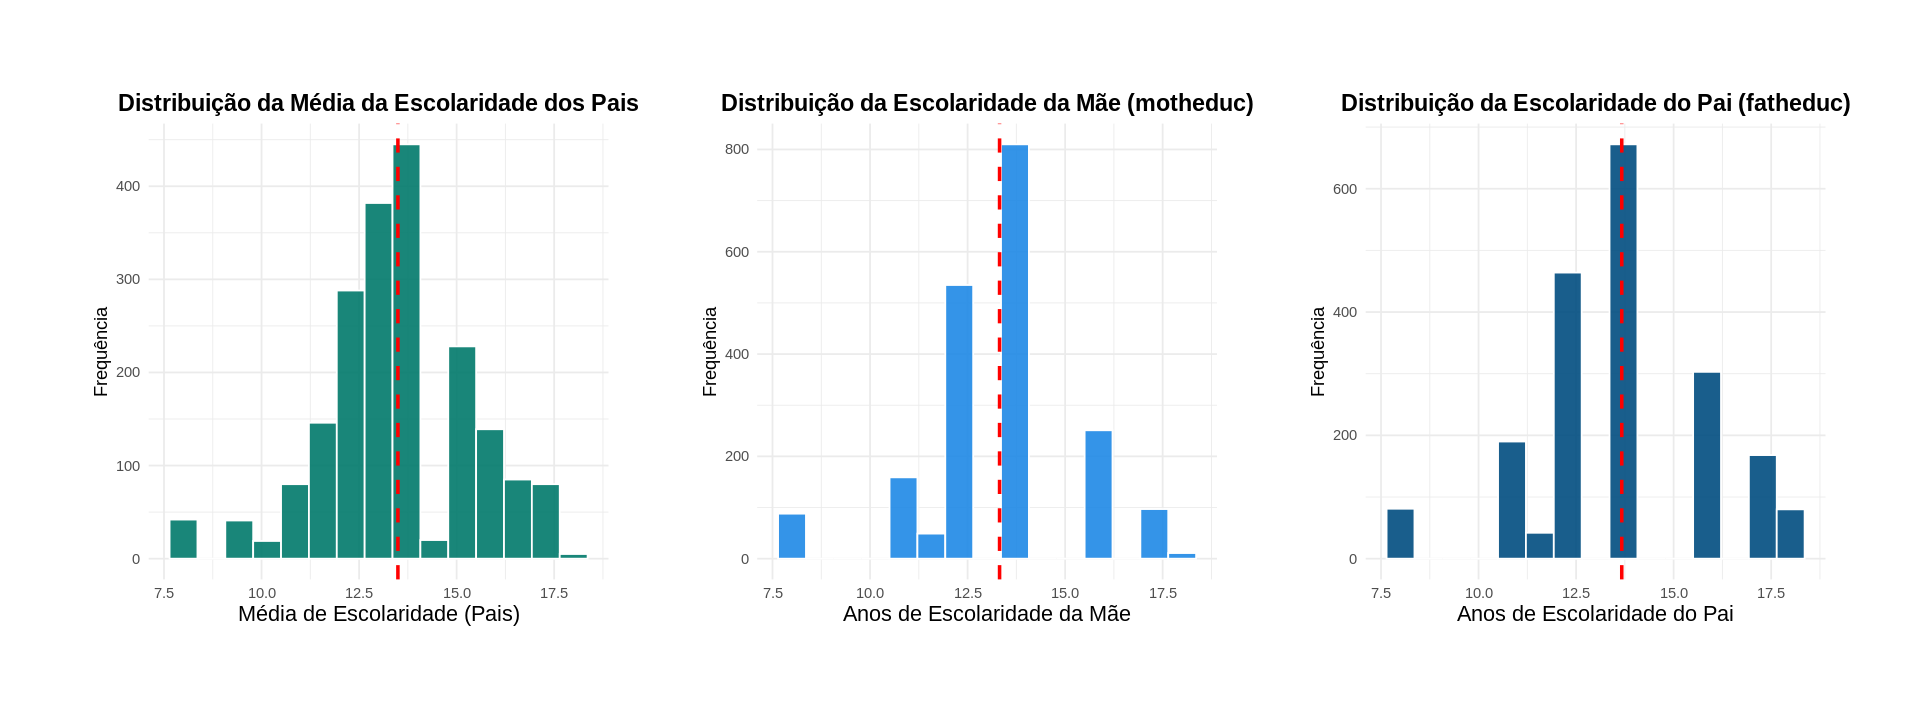

In [70]:
# Criar uma nova variável: média da escolaridade dos pais
dados_tratados <- dados_tratados %>%
  mutate(parenteduc_avg = (motheduc + fatheduc) / 2)

# --- Gráfico da escolaridade da mãe ---
p_motheduc <- ggplot(dados_tratados, aes(x = motheduc)) +
  geom_histogram(bins = 15, fill = "#1E88E5", color = "white", alpha = 0.9) +
  geom_vline(aes(xintercept = mean(motheduc, na.rm = TRUE)),
             color = "red", linetype = "dashed", linewidth = 1) +
  labs(title = "Distribuição da Escolaridade da Mãe (motheduc)",
       x = "Anos de Escolaridade da Mãe", y = "Frequência") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 14),
    axis.title.x = element_text(size = 13),
    plot.margin = margin(10, 20, 10, 20)
  )

# --- Gráfico da escolaridade do pai ---
p_fatheduc <- ggplot(dados_tratados, aes(x = fatheduc)) +
  geom_histogram(bins = 15, fill = "#004D80", color = "white", alpha = 0.9) +
  geom_vline(aes(xintercept = mean(fatheduc, na.rm = TRUE)),
             color = "red", linetype = "dashed", linewidth = 1) +
  labs(title = "Distribuição da Escolaridade do Pai (fatheduc)",
       x = "Anos de Escolaridade do Pai", y = "Frequência") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 14),
    axis.title.x = element_text(size = 13),
    plot.margin = margin(10, 20, 10, 20)
  )

# --- Gráfico da média da escolaridade dos pais ---
p_parenteduc_avg <- ggplot(dados_tratados, aes(x = parenteduc_avg)) +
  geom_histogram(bins = 15, fill = "#00796B", color = "white", alpha = 0.9) +
  geom_vline(aes(xintercept = mean(parenteduc_avg, na.rm = TRUE)),
             color = "red", linetype = "dashed", linewidth = 1) +
  labs(title = "Distribuição da Média da Escolaridade dos Pais",
       x = "Média de Escolaridade (Pais)", y = "Frequência") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 14),
    axis.title.x = element_text(size = 13),
    plot.margin = margin(10, 20, 10, 20)
  )

# --- Exibir os três gráficos lado a lado ---
options(repr.plot.width = 16, repr.plot.height = 6)

(p_parenteduc_avg + p_motheduc + p_fatheduc) &
  theme(plot.margin = unit(c(1, 1, 1, 1), "cm"))


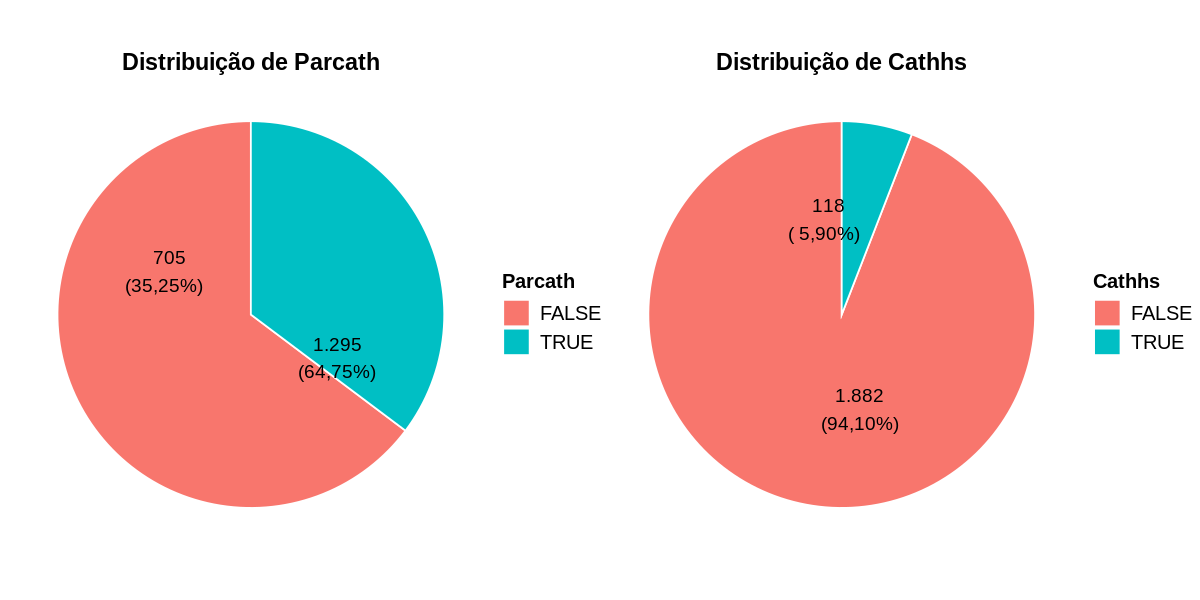

In [71]:
# Prepare data for parcath pie chart
parcath_data = dados_tratados %>%
  filter(!is.na(parcath)) %>%
  count(parcath) %>%
  mutate(
    percentage = n / sum(n) * 100,
    label_text = paste0(
      format(round(n, 0), big.mark = ".", decimal.mark = ","), "\n(",
      format(round(percentage, 2), nsmall = 2, decimal.mark = ","), "%)"
    ),
    label_pos = cumsum(percentage) - 0.5 * percentage
  )

# Create parcath pie chart
p_parcath = ggplot(parcath_data, aes(x = "", y = percentage, fill = parcath)) +
  geom_bar(width = 1, stat = "identity", color = "white") +
  geom_text(aes(y = label_pos, label = label_text), color = "black", size = 4) +
  coord_polar(theta = "y") +
  labs(title = "Distribuição de Parcath", fill = "Parcath") +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 14),
    legend.title = element_text(face = "bold", size = 12),
    legend.text = element_text(size = 12)
  )

  # Prepare data for cathhs pie chart
cathhs_data = dados_tratados %>%
  filter(!is.na(cathhs)) %>%
  count(cathhs) %>%
  mutate(
    percentage = n / sum(n) * 100,
    label_text = paste0(
      format(round(n, 0), big.mark = ".", decimal.mark = ","), "\n(",
      format(round(percentage, 2), nsmall = 2, decimal.mark = ","), "%)"
    ),
    label_pos = cumsum(percentage) - 0.5 * percentage
  )

# Create cathhs pie chart
p_cathhs = ggplot(cathhs_data, aes(x = "", y = percentage, fill = cathhs)) +
  geom_bar(width = 1, stat = "identity", color = "white") +
  geom_text(aes(y = label_pos, label = label_text), color = "black", size = 4) +
  coord_polar(theta = "y") +
  labs(title = "Distribuição de Cathhs", fill = "Cathhs") +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 14),
    legend.title = element_text(face = "bold", size = 12),
    legend.text = element_text(size = 12)
  )

# Display both plots
options(repr.plot.width = 10, repr.plot.height = 5)
p_parcath + p_cathhs

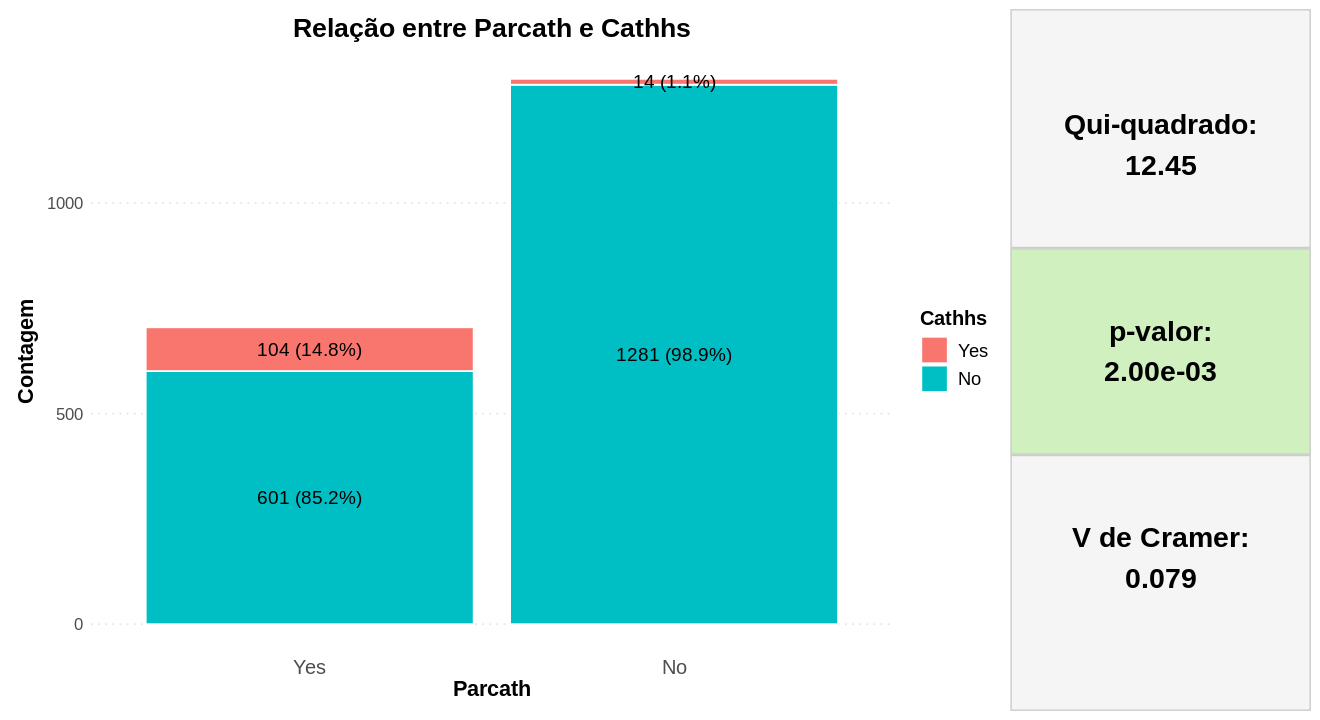

In [72]:
# Filter out rows with missing values in 'parcath' or 'cathhs' and create contingency table
parcath_cathhs_counts <- dados_tratados %>%
  filter(!is.na(parcath) & !is.na(cathhs)) %>%
  count(parcath, cathhs) %>%
  # Convert boolean to factors for better plotting labels
  mutate(
    parcath = factor(parcath, levels = c(TRUE, FALSE), labels = c("Yes", "No")),
    cathhs = factor(cathhs, levels = c(TRUE, FALSE), labels = c("Yes", "No"))
  ) %>%
  group_by(parcath) %>%
  mutate(
    perc = n / sum(n) * 100,  # calcula % dentro de cada grupo de parcath
    label = paste0(n, " (", sprintf("%.1f%%", perc), ")")
  ) %>%
  ungroup()

# Gráfico de barras empilhadas (mantém seu estilo)
p_bar <- ggplot(parcath_cathhs_counts, aes(x = parcath, y = n, fill = cathhs)) +
  geom_col(position = "stack", color = "white") +
  geom_text(aes(label = label), position = position_stack(vjust = 0.5),
            color = "black", size = 4) +
  labs(
    title = "Relação entre Parcath e Cathhs",
    x = "Parcath",
    y = "Contagem",
    fill = "Cathhs"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
    axis.title.x = element_text(face = "bold", size = 13),
    axis.title.y = element_text(face = "bold", size = 13),
    axis.text.x = element_text(size = 12),
    axis.text.y = element_text(size = 10),
    legend.title = element_text(face = "bold", size = 12),
    legend.text = element_text(size = 11),
    panel.grid.major.x = element_blank(),
    panel.grid.minor.y = element_blank(),
    panel.grid.major.y = element_line(color = "gray90", linetype = "dotted"),
    plot.background = element_rect(fill = "white", color = NA),
    panel.background = element_rect(fill = "white", color = NA)
  )

# --- RESULTADOS DO TESTE QUI-QUADRADO ---
chi_squared_result <- list(
  statistic = 12.45,
  parameter = 2,
  p.value = 0.002
)

# --- Cálculo do V de Cramer ---
n <- sum(parcath_cathhs_counts$n)
min_dim <- min(length(unique(parcath_cathhs_counts$parcath)),
               length(unique(parcath_cathhs_counts$cathhs)))
cramer_v <- sqrt(chi_squared_result$statistic / (n * (min_dim - 1)))

# --- FUNÇÃO PARA CRIAR CARDS ---
make_card <- function(texto, valor, cor_fundo = "#f5f5f5") {
  ggplot() +
    annotate("text", x = 0.5, y = 0.5,
             label = paste0(texto, ":\n", valor),
             size = 6, fontface = "bold") +
    theme_void() +
    theme(
      plot.background = element_rect(fill = cor_fundo, color = "gray80", linewidth = 0.8),
      plot.margin = margin(6, 10, 6, 10)
    )
}

# Cores automáticas: p < 0.05 verde, caso contrário cinza
cor_p <- ifelse(chi_squared_result$p.value < 0.05, "#d0f0c0", "#f5f5f5")

# Criar os três cards
card_chi <- make_card("Qui-quadrado", round(chi_squared_result$statistic, 3))
card_p   <- make_card("p-valor", formatC(chi_squared_result$p.value, format = "e", digits = 2), cor_fundo = cor_p)
card_v   <- make_card("V de Cramer", round(cramer_v, 3))

# Combinar: gráfico à esquerda, cards empilhados à direita
final_plot <- p_bar + (card_chi / card_p / card_v) +
  plot_layout(widths = c(3, 1))

# Exibir
options(repr.plot.width = 11, repr.plot.height = 6)
print(final_plot)


Warning message:
“Removed 13 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


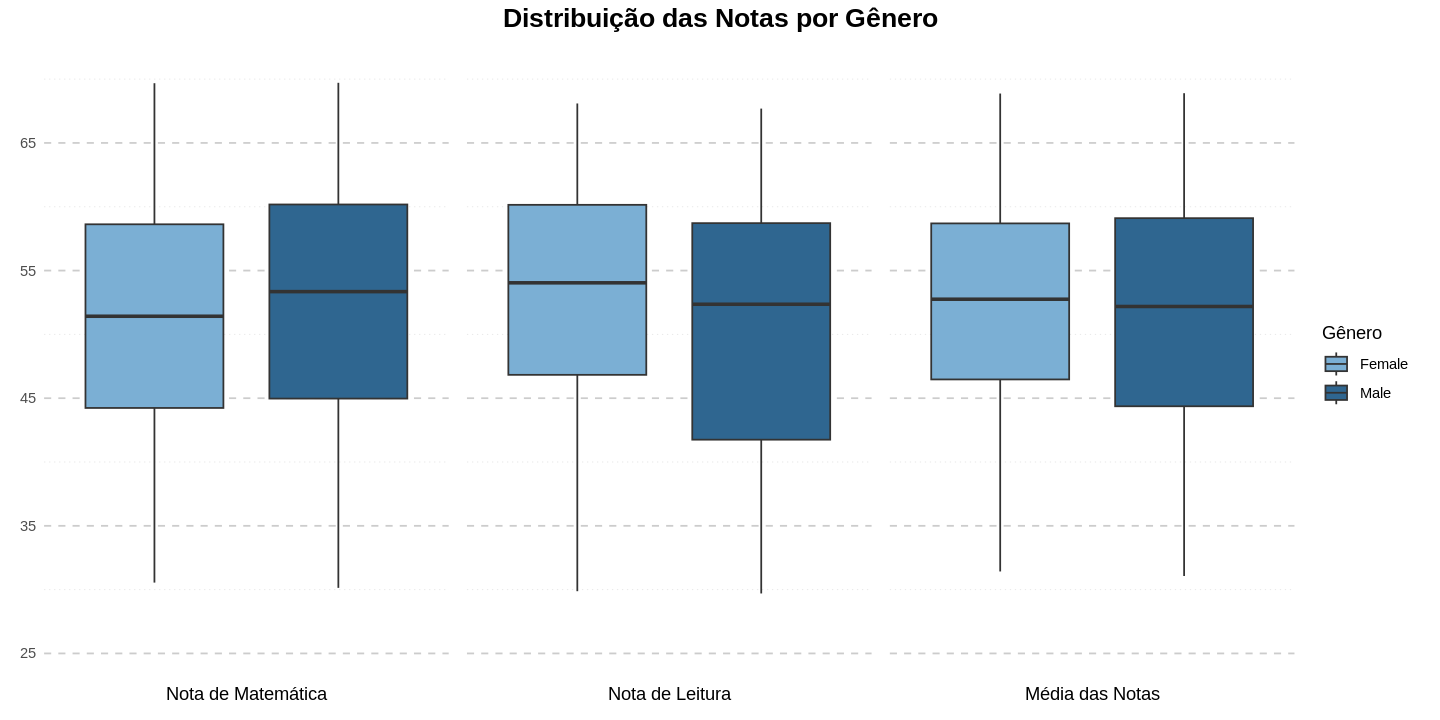

In [84]:
library(ggplot2)
library(patchwork)

# Paleta de cores
cores_azuis <- c("Female" = "#7BAFD4", "Male" = "#2F6690")

# Função para criar boxplot
criar_boxplot <- function(y_var, y_label, mostrar_legenda = FALSE, mostrar_eixo_y = FALSE) {
  p <- ggplot(dados_tratados, aes(x = gender, y = .data[[y_var]], fill = gender)) +
    geom_boxplot() +
    labs(x = y_label, fill = "Gênero") +
    scale_y_continuous(
      limits = c(25, 70),
      breaks = seq(25, 70, 10)
    ) +
    theme_minimal() +
    theme(
      plot.title = element_blank(),
      axis.title.y = element_blank(),
      axis.text.x = element_blank(),
      axis.ticks.x = element_blank(),
      panel.grid.major.y = element_line(color = "gray80", linetype = "dashed"),
      panel.grid.minor.y = element_line(color = "gray90", linetype = "dotted"),
      panel.grid.minor.x = element_blank(),
      panel.grid.major.x = element_blank(),
      legend.position = if (mostrar_legenda) "right" else "none"
    ) +
    scale_fill_manual(values = cores_azuis)

  # Adiciona os números do eixo y apenas se solicitado
  if (!mostrar_eixo_y) {
    p <- p + theme(axis.text.y = element_blank())
  }

  return(p)
}

# Criar os três boxplots
p_math12 <- criar_boxplot("math12", "Nota de Matemática", mostrar_eixo_y = TRUE)
p_read12 <- criar_boxplot("read12", "Nota de Leitura")  # Eixo y visível
p_average_score <- criar_boxplot("average_score", "Média das Notas", mostrar_legenda = TRUE)

# Combinar com título global
options(repr.plot.width = 12, repr.plot.height = 6)
(p_math12 + p_read12 + p_average_score) +
  plot_annotation(
    title = "Distribuição das Notas por Gênero",
    theme = theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 16))
  )


In [79]:
# --- 1️⃣ Tabela de contingência Parcath x Raça ---
# Filtrar NA e criar tabela
contingency_table <- table(dados_tratados$parcath, dados_tratados$race_name, useNA = "no")

# Adicionar nomes mais descritivos para Parcath
rownames(contingency_table) <- c("Yes", "No")  # TRUE = Yes, FALSE = No

cat("\nTabela de Contingência: Parcath vs. Raça\n")
print(contingency_table)
cat("\nProporções relativas (%):\n")
print(round(prop.table(contingency_table, margin = 1) * 100, 2))  # porcentagem por linha

# --- 2️⃣ Teste Qui-quadrado ---
chi_result <- chisq.test(contingency_table)

# Cálculo do V de Cramer
n_total <- sum(chi_result$observed)
min_dim <- min(nrow(chi_result$observed), ncol(chi_result$observed))
cramer_v <- sqrt(chi_result$statistic / (n_total * (min_dim - 1)))

# Exibir resultados
cat("\nResultados do Teste Qui-quadrado: Parcath vs. Raça\n")
cat("Estatística do Qui-quadrado:", round(chi_result$statistic, 4), "\n")
cat("Graus de Liberdade:", chi_result$parameter, "\n")
cat("P-valor:", formatC(chi_result$p.value, format = "e", digits = 4), "\n")
cat("V de Cramer:", round(cramer_v, 4), "\n")



Tabela de Contingência: Parcath vs. Raça
     
      Asian Black Hispan White
  Yes    66   134     40  1055
  No     26    11    169   499

Proporções relativas (%):
     
      Asian Black Hispan White
  Yes  5.10 10.35   3.09 81.47
  No   3.69  1.56  23.97 70.78

Resultados do Teste Qui-quadrado: Parcath vs. Raça
Estatística do Qui-quadrado: 247.7948 
Graus de Liberdade: 3 
P-valor: 1.9623e-53 
V de Cramer: 0.352 


`geom_smooth()` using formula = 'y ~ x'


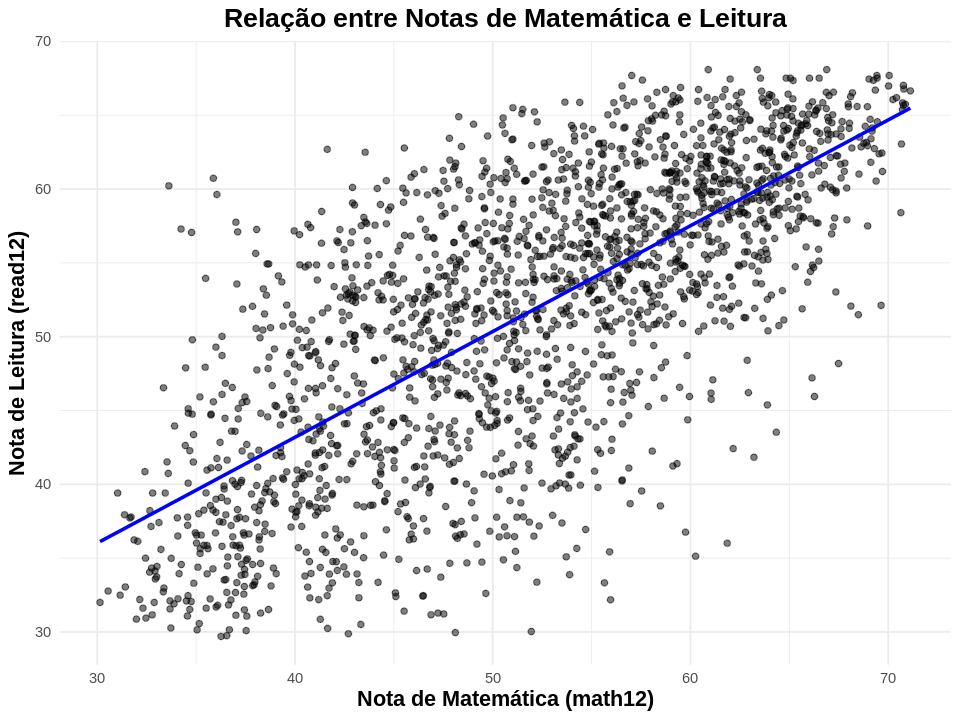

In [81]:
# Create a scatter plot of read12 vs. math12
p_scatter_scores <- ggplot(dados_tratados, aes(x = math12, y = read12)) +
  geom_point(alpha = 0.5) + # Add points with some transparency
  geom_smooth(method = "lm", color = "blue", se = FALSE) + # Add a linear regression line
  labs(
    title = "Relação entre Notas de Matemática e Leitura",
    x = "Nota de Matemática (math12)",
    y = "Nota de Leitura (read12)"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
    axis.title.x = element_text(face = "bold", size = 13),
    axis.title.y = element_text(face = "bold", size = 13),
    plot.background = element_rect(fill = "white", color = NA),
    panel.background = element_rect(fill = "white", color = NA)
  )

# Display the plot
options(repr.plot.width = 8, repr.plot.height = 6)
print(p_scatter_scores)

In [82]:
# Calculate the Pearson correlation matrix for numerical columns
numerical_cols <- dados_tratados %>%
  select(where(is.numeric)) %>%
  select(-id) # Exclude the 'id' column if it exists

correlation_matrix <- cor(numerical_cols, use = "complete.obs", method = "pearson")

# Display the correlation matrix using kable for better formatting
kable(correlation_matrix,
      digits = 4,
      caption = "Matriz de Correlação de Pearson",
      format = "pipe")



Table: Matriz de Correlação de Pearson

|               |  read12|  math12| motheduc| fatheduc| lfaminc| race_code| average_score| parenteduc_avg|
|:--------------|-------:|-------:|--------:|--------:|-------:|---------:|-------------:|--------------:|
|read12         |  1.0000|  0.7084|   0.2964|   0.3478|  0.2489|   -0.1764|        0.9251|         0.3627|
|math12         |  0.7084|  1.0000|   0.3340|   0.4058|  0.2963|   -0.1832|        0.9234|         0.4171|
|motheduc       |  0.2964|  0.3340|   1.0000|   0.5910|  0.3622|   -0.1516|        0.3409|         0.8769|
|fatheduc       |  0.3478|  0.4058|   0.5910|   1.0000|  0.4049|   -0.1731|        0.4075|         0.9059|
|lfaminc        |  0.2489|  0.2963|   0.3622|   0.4049|  1.0000|   -0.2651|        0.2948|         0.4313|
|race_code      | -0.1764| -0.1832|  -0.1516|  -0.1731| -0.2651|    1.0000|       -0.1945|        -0.1827|
|average_score  |  0.9251|  0.9234|   0.3409|   0.4075|  0.2948|   -0.1945|        1.0000|         0.4